In [15]:
# Importing libraries and dataset

import numpy as np
import pandas as pd
data = pd.read_csv("F:\MachineHack\Regression Analysis\Simple Linear Regression\Salary_Data.csv")

In [16]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [17]:
# Defining input and output features

x = data.iloc[:, :-1].values # all columns except last one
y = data.iloc[:, -1].values  # only last column
print(x.shape, y.shape)

(30, 1) (30,)


In [18]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [20]:
# Defining the training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [21]:
# Training a 'Simple Linear Regression' model

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)
print(slr)

LinearRegression()


In [22]:
# Checking out the regression coeffiecient and the intercept

print('Regression Coefficient = ', slr.coef_[0])
print('Intercept = ', slr.intercept_)

Regression Coefficient =  9312.575126729189
Intercept =  26780.09915062818


In [23]:
# Printing the Fitted Linear Regression Line

print('Y = ', slr.intercept_,' + ', slr.coef_[0],'* X')

Y =  26780.09915062818  +  9312.575126729189 * X


In [24]:
# Here, Y = Salary and X = Years of experience.
# So, a person with zero experience gets salary
# equal to intercept.

# Our model predicts the salaries using number of
# years of experience based on the above equation.

# For example, let us see salary of a person with
# '0' years experience and salary of a person with
# '1.5' years experience.

print('Exp[0] : Sal = ', slr.predict([[0]]))
print('Exp[0] : Sal = ', slr.predict([[1.5]]))

Exp[0] : Sal =  [26780.09915063]
Exp[0] : Sal =  [40748.96184072]


In [25]:
# Making predictions on the test data

y_pred = slr.predict(x_test)

# Comparing predicted and actual salaries
print(pd.DataFrame(data={'Predicted Salary':y_pred, 'Actual Salary':y_test}))

   Predicted Salary  Actual Salary
0      40748.961841        37731.0
1     122699.622956       122391.0
2      64961.657170        57081.0
3      63099.142145        63218.0
4     115249.562855       116969.0
5     107799.502753       109431.0


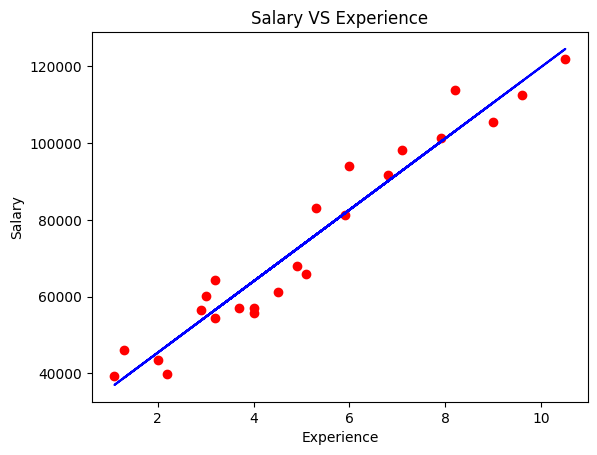

In [26]:
# Now for better understanding, let us visualize the regression line

import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, slr.predict(x_train), color='blue')
plt.title('Salary VS Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [27]:
# Now let us calculate MSE, RMSE and R-Squared to evaluate our model

# MSE : Mean Squared Error
# RMSE : Root Mean Squared Error
# R-Squared : Metric used for evaluation of regression model

from sklearn.metrics import mean_squared_error, r2_score
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE = ', mse)
print('RMSE = ', rmse)
print('R-Squared = ', r2)

MSE =  12823412.298126549
RMSE =  3580.979237321343
R-Squared =  0.988169515729126


In [28]:
# Note that, value of R-Squared is closer to 1.
# This means that our model is well fitted

# R-Squared = 0 : Poorly fitted model
# R-Squared = 1 : Best fitted model